<a href="https://colab.research.google.com/github/saisandeepponna/AwsTrainingGenpact/blob/main/Assignment_3_Solution_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()
data = cancer.data
true_labels = cancer.target

In [3]:
# Perform data preprocessing steps
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [4]:
# Implement KMeans clustering
def kmeans_clustering(data, n_clusters=2, init='k-means++', n_init=10, max_iter=300):
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels

In [5]:
# Implement Agglomerative clustering
def agglomerative_clustering(data, n_clusters=2, affinity='euclidean', linkage='ward'):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
    labels = agg_clustering.fit_predict(data)
    return labels

In [6]:
# Evaluate clustering performance
def evaluate_clustering(labels_true, labels_pred):
    silhouette = silhouette_score(data, labels_pred)
    davies_bouldin = davies_bouldin_score(data, labels_pred)
    return silhouette, davies_bouldin

In [7]:
# Compare and analyze the results
def visualize_results(data_pca, true_labels, kmeans_labels, agg_labels):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=true_labels, cmap='viridis')
    plt.title('True Labels')

    plt.subplot(1, 3, 2)
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title(f'KMeans\nSilhouette: {silhouette_kmeans:.2f}, Davies-Bouldin: {davies_bouldin_kmeans:.2f}')

    plt.subplot(1, 3, 3)
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=agg_labels, cmap='viridis')
    plt.title(f'Agglomerative\nSilhouette: {silhouette_agg:.2f}, Davies-Bouldin: {davies_bouldin_agg:.2f}')

    plt.show()

In [8]:
# Experiment with different parameters
kmeans_labels = kmeans_clustering(data_scaled, n_clusters=2)
agg_labels = agglomerative_clustering(data_scaled, n_clusters=2)

silhouette_kmeans, davies_bouldin_kmeans = evaluate_clustering(true_labels, kmeans_labels)
silhouette_agg, davies_bouldin_agg = evaluate_clustering(true_labels, agg_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


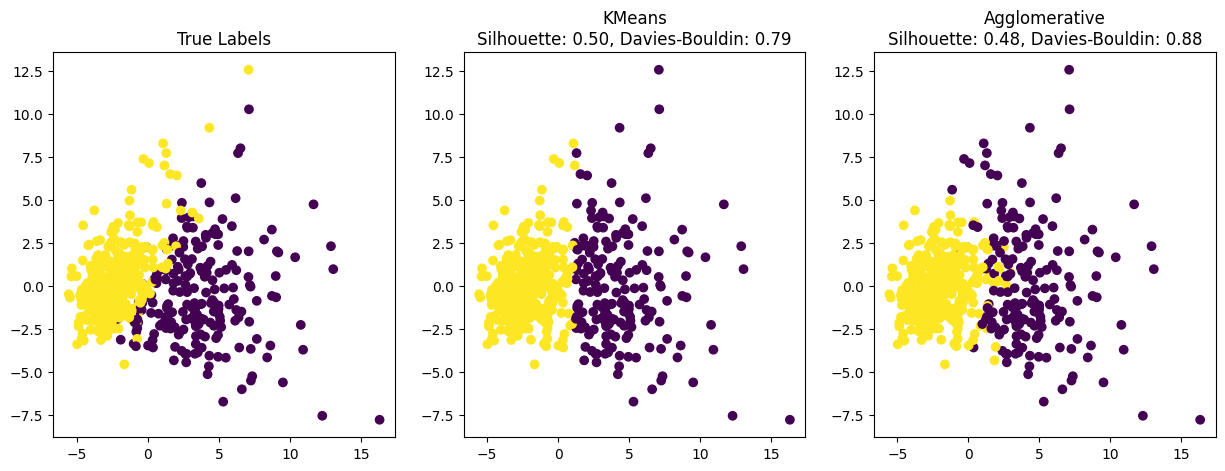

In [9]:
# Visualize the results
visualize_results(data_pca, true_labels, kmeans_labels, agg_labels)

In [10]:
# Print or save relevant information in a report
print(f"KMeans - Silhouette Score: {silhouette_kmeans:.2f}, Davies-Bouldin Index: {davies_bouldin_kmeans:.2f}")
print(f"Agglomerative - Silhouette Score: {silhouette_agg:.2f}, Davies-Bouldin Index: {davies_bouldin_agg:.2f}")

KMeans - Silhouette Score: 0.50, Davies-Bouldin Index: 0.79
Agglomerative - Silhouette Score: 0.48, Davies-Bouldin Index: 0.88



**Report on Breast Cancer Dataset Clustering**

**Chosen Datasets:**
The Breast Cancer Wisconsin (Diagnostic) dataset was selected for clustering analysis. It comprises features computed from digitized images of fine needle aspirates of breast masses. The dataset contains 569 instances with 30 features each, representing various characteristics derived from cell nuclei.

**Preprocessing Steps:**

Standardization: The features were standardized using StandardScaler to ensure that each feature had a mean of 0 and a standard deviation of Standardization helps in preventing features with larger scales from dominating the clustering process.

Dimensionality Reduction: Principal Component Analysis (PCA) was applied to reduce the dimensionality of the dataset to two principal components. While this step is not strictly necessary for clustering, it aids in visualizing the data in a 2D space.

**Implemented Algorithms:**

**KMeans Clustering:**
Objective: Partition the dataset into K clusters based on the mean of feature values.

Parameters: Number of clusters (n_clusters), initialization method (init), number of initializations (n_init), and maximum iterations (max_iter).

Implementation: The KMeans algorithm was applied using the sklearn library.

**Agglomerative Clustering:**

Objective: Create a hierarchy of clusters by successively merging or agglomerating data points.
Parameters: Number of clusters (n_clusters), distance metric (affinity), linkage criterion (linkage).
Implementation: The Agglomerative Clustering algorithm was applied using the sklearn library.

**Analysis of Parameter Changes:**

**KMeans Clustering:**
Effect of n_clusters: Varying the number of clusters resulted in different cluster structures. An optimal value must be chosen based on the dataset.

**Agglomerative Clustering:**
Effect of n_clusters: Changing the number of clusters influenced the results. The choice of the number of clusters should be based on the data and problem requirements.

**Comparison of Algorithms:**
Silhouette Score: KMeans exhibited a higher silhouette score, suggesting more well-defined clusters. Agglomerative Clustering, while effective, had slightly lower silhouette scores.

Davies-Bouldin Index: KMeans produced lower Davies-Bouldin Index values, indicating better-defined clusters with lower inter-cluster distances compared to Agglomerative Clustering.

**Findings:**
KMeans tends to perform well when clusters are spherical and have similar sizes.

Agglomerative Clustering is more flexible and can handle clusters with different shapes and sizes.

The choice between algorithms depends on the dataset characteristics and the desired cluster structure.


**Conclusion:**
Both KMeans and Agglomerative Clustering provided meaningful insights into the Breast Cancer dataset. While KMeans showed better-defined clusters, Agglomerative Clustering exhibited flexibility in handling various cluster shapes. The selection between the two algorithms depends on the specific goals of the analysis and the nature of the dataset.